In [216]:
import pandas as pd
import plotly.express as px 
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from matplotlib import style
plt.style.use('ggplot')
from pandas.plotting import scatter_matrix  

#***Data reading***

In [217]:
DataNames = ['employee_survey', 'general', 'manager_survey', 'retirement']

In [218]:
for df in DataNames:
  globals()[f'df_{df}'] = pd.read_csv(f'https://raw.githubusercontent.com/santiagogz11/HRProject/main/cleanData/df_{df}.csv', engine='python', sep=None, index_col=0)

In [219]:
# Convertir los tipos de variables al más apropiado
employeeSurveyColumns = {'EmployeeID':'string'}
df_employee_survey = df_employee_survey.astype(employeeSurveyColumns)

generalColumns = {'EmployeeID':'string'}
df_general = df_general.astype(generalColumns)

managerSurveyColumns = {'EmployeeID':'string'}
df_manager_survey = df_manager_survey.astype(managerSurveyColumns)

retirementColumns = {'EmployeeID':'string', 'retirementType':'string', 'resignationReason':'string'}
df_retirement = df_retirement.astype(retirementColumns)

df_retirement['retirementDate'] = pd.to_datetime(df_retirement['retirementDate'])

#***Visualization***

##***1. Employee survey***

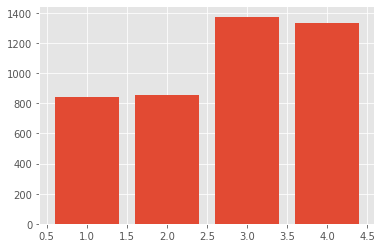

In [220]:
plt.bar(df_employee_survey.EnvironmentSatisfaction.value_counts().index, df_employee_survey.EnvironmentSatisfaction.value_counts().values)
plt.show()
# Aproximadamente el 40% de los empleados tienen una baja-media percepción del ambiente de trabajo

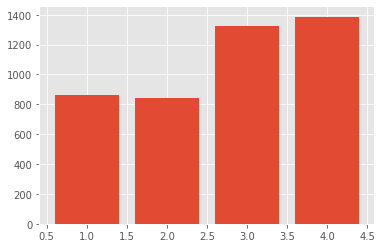

In [221]:
plt.bar(df_employee_survey.JobSatisfaction.value_counts().index, df_employee_survey.JobSatisfaction.value_counts().values)
plt.show()
# Aproximadamente el 40% de los empleados tienen una baja-media percepción con el empleo

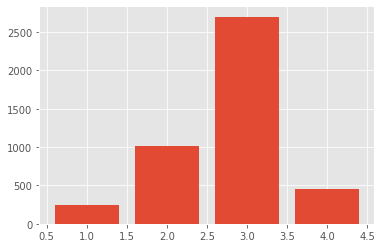

In [222]:
plt.bar(df_employee_survey.WorkLifeBalance.value_counts().index, df_employee_survey.WorkLifeBalance.value_counts().values)
plt.show()
# Aproximadamente el 30% de los empleados tienen un balance de vida-trabajo medio bueno

##***2. Manager survey***

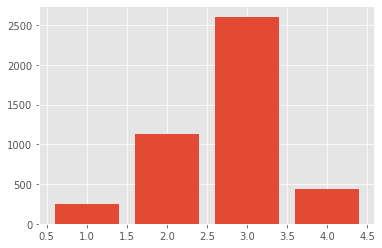

In [223]:
plt.bar(df_manager_survey.JobInvolvement.value_counts().index, df_manager_survey.JobInvolvement.value_counts().values)
plt.show()
# Aproximadamente el 30% de los empleados tienen una baja-media participación

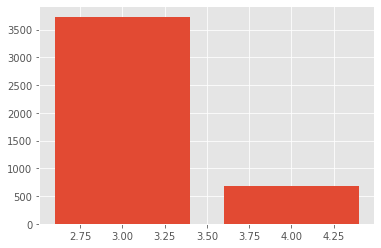

In [224]:
plt.bar(df_manager_survey.PerformanceRating.value_counts().index, df_manager_survey.PerformanceRating.value_counts().values)
plt.show()
# La mayoría de empleados tienen buen rendimiento

##***3. Retirement***

In [225]:
df_retirement.columns

Index(['EmployeeID', 'Attrition', 'retirementDate', 'retirementType',
       'resignationReason'],
      dtype='object')

In [226]:
df_retirement['month'] = df_retirement.retirementDate.dt.month

In [227]:
df = df_retirement.groupby(['month', 'resignationReason'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})
fig = px.bar(df, x='month', y='quantity', color='resignationReason', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

In [228]:
df = pd.merge(df_general[['EmployeeID', 'Department']], df_retirement, on = 'EmployeeID', how = 'right')

In [229]:
df = df.groupby(['Department', 'resignationReason'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})

In [230]:
fig = px.sunburst(df, path=['resignationReason', 'Department'], values='quantity', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

In [231]:
fig = px.sunburst(df, path=['Department', 'resignationReason'], values='quantity', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

In [232]:
df = pd.merge(df_general[['EmployeeID', 'MaritalStatus']], df_retirement, on = 'EmployeeID', how = 'right')

In [233]:
df = df.groupby(['MaritalStatus', 'resignationReason'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})

In [234]:
fig = px.sunburst(df, path=['resignationReason', 'MaritalStatus'], values='quantity', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

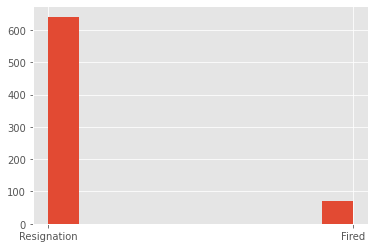

In [235]:
df_retirement.retirementType.hist()
plt.show()

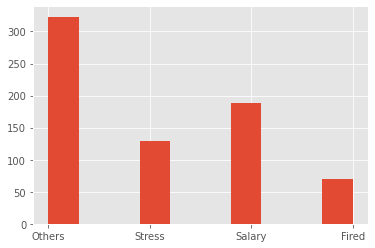

In [236]:
df_retirement.resignationReason.hist()
plt.show()

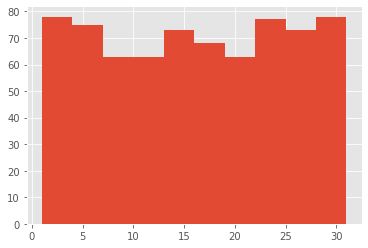

In [237]:
df_retirement.retirementDate.dt.day.hist()
plt.show()

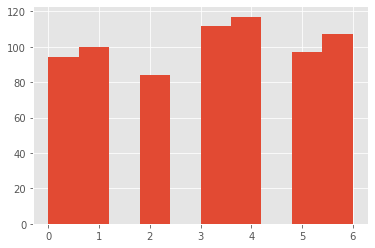

In [238]:
df_retirement.retirementDate.dt.day_of_week.hist()
plt.show()

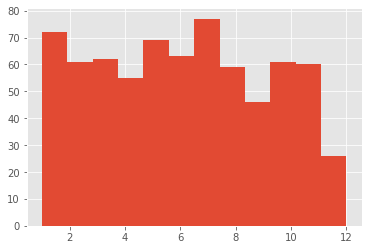

In [239]:
df_retirement.retirementDate.dt.month.hist(bins=12)
plt.show()

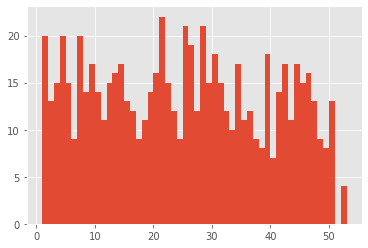

In [240]:
df_retirement.retirementDate.dt.isocalendar().week.hist(bins=52)
plt.show()

## ***4. General***

In [241]:
df_general.columns

Index(['Age', 'BusinessTravel', 'Department', 'DistanceFromHome', 'Education',
       'EducationField', 'EmployeeID', 'Gender', 'JobLevel', 'JobRole',
       'MaritalStatus', 'MonthlyIncome', 'NumCompaniesWorked',
       'PercentSalaryHike', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'YearsAtCompany', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

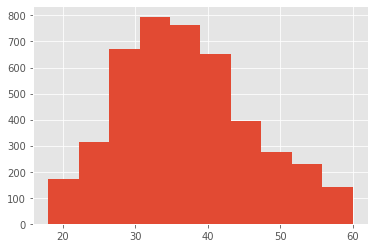

In [242]:
df_general.Age.hist()
plt.show()

In [243]:
df = df_general.groupby(['Department'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})
fig = px.pie(df, values='quantity', names='Department', hole = 0.3, color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig

In [244]:
df = df_general.groupby(['BusinessTravel'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})
fig = px.pie(df, values='quantity', names='BusinessTravel', hole = 0.3, color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig

In [245]:
df = df_general.groupby(['EducationField'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})
fig = px.pie(df, values='quantity', names='EducationField', hole = 0.3, color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig

In [246]:
df = df_general.groupby(['Gender'])['EmployeeID'].count().reset_index().rename(columns={'EmployeeID':'quantity'})
fig = px.pie(df, values='quantity', names='Gender', hole = 0.3, color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig

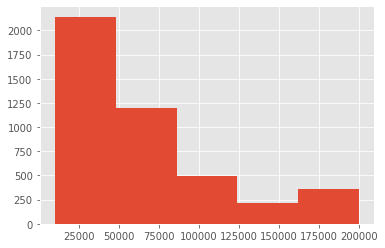

In [247]:
df_general.MonthlyIncome.hist(bins=5)
plt.show()

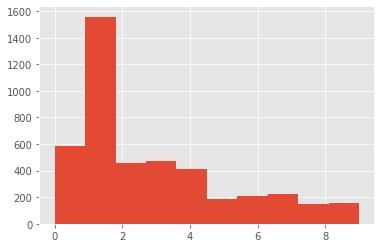

In [248]:
df_general.NumCompaniesWorked.hist()
plt.show()

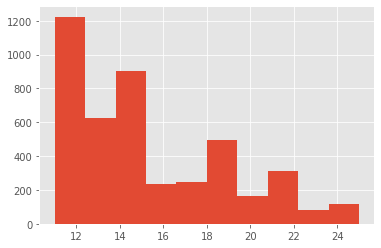

In [249]:
df_general.PercentSalaryHike.hist()
plt.show()

In [250]:
df = pd.merge(df_general, df_retirement[['EmployeeID', 'Attrition']], on = 'EmployeeID', how = 'left')

In [251]:
df.Attrition.fillna('No', inplace=True)

In [252]:
df = (df.groupby(['PercentSalaryHike', 'Attrition'])[['EmployeeID']].count()/df.groupby(['PercentSalaryHike'])[['EmployeeID']].count()).reset_index().rename(columns={'EmployeeID':'percentage'})

In [253]:
fig = px.bar(df, x='PercentSalaryHike', y='percentage', color='Attrition', color_discrete_sequence=px.colors.sequential.Aggrnyl)
fig.show()

In [266]:
df = pd.merge(df_general, df_employee_survey[['EmployeeID', 'JobSatisfaction']], on = 'EmployeeID', how = 'left')

In [267]:
df = (df.groupby(['Age', 'JobSatisfaction'])[['EmployeeID']].count()/df.groupby(['Age'])[['EmployeeID']].count()).reset_index().rename(columns={'EmployeeID':'quantity'})

In [268]:
fig = px.bar(df, x='Age', y='quantity', color='JobSatisfaction', color_continuous_scale=px.colors.sequential.Aggrnyl)
fig.show()

# ***Correlations***

In [308]:
df = pd.merge(df_general, df_employee_survey, on = 'EmployeeID', how = 'left')
df = pd.merge(df, df_manager_survey, on = 'EmployeeID', how = 'left')
df = pd.merge(df_general, df_retirement[['EmployeeID','Attrition']], on = 'EmployeeID', how = 'left')

In [309]:
df.Attrition.fillna('No', inplace = True)

In [310]:
dummies = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
df = pd.concat([pd.get_dummies(df[dummies]), df.loc[:,~df.columns.isin(dummies)]], axis = 1)
df.Attrition.replace({'Yes':1, 'No':0}, inplace=True)

In [313]:
df.corr()['Attrition']

BusinessTravel_Non-Travel           -0.074457
BusinessTravel_Travel_Frequently     0.115143
BusinessTravel_Travel_Rarely        -0.049538
Department_Human Resources           0.080768
Department_Research & Development   -0.015307
Department_Sales                    -0.019742
EducationField_Human Resources       0.091573
EducationField_Life Sciences         0.012394
EducationField_Marketing            -0.003780
EducationField_Medical               0.000764
EducationField_Other                -0.025958
EducationField_Technical Degree     -0.040646
Gender_Female                       -0.018125
Gender_Male                          0.018125
JobRole_Healthcare Representative   -0.013768
JobRole_Human Resources             -0.013857
JobRole_Laboratory Technician        0.001179
JobRole_Manager                     -0.017798
JobRole_Manufacturing Director      -0.045770
JobRole_Research Director            0.049760
JobRole_Research Scientist           0.027460
JobRole_Sales Executive           

# ***Save Data***

In [314]:
from google.colab import drive

In [315]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df.to_csv('/content/drive/MyDrive/AplicacionesAnalitica/HR/GitHub/HRProject/cleanData/df.csv')